In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/home/rgukt/Desktop/pro/case1_considered/memory_usage.csv")
df

,timestamp,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory
0,2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3
1,2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2
2,2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8
3,2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4
4,2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5
...,...,...,...,...,...
507,2024-06-15 22:10:48,5853.63,1914.05,3600.78,67.3
508,2024-06-15 22:11:48,5853.63,1913.72,3601.12,67.3
509,2024-06-15 22:12:48,5853.63,1893.03,3621.81,67.7
510,2024-06-15 22:13:48,5853.63,1899.71,3615.12,67.5


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


timestamp              0
total_memory_mb        0
available_memory_mb    0
used_memory_mb         0
percent_memory         0
dtype: int64


In [5]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [6]:
df

,timestamp,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory
0,2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3
1,2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2
2,2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8
3,2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4
4,2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5
...,...,...,...,...,...
507,2024-06-15 22:10:48,5853.63,1914.05,3600.78,67.3
508,2024-06-15 22:11:48,5853.63,1913.72,3601.12,67.3
509,2024-06-15 22:12:48,5853.63,1893.03,3621.81,67.7
510,2024-06-15 22:13:48,5853.63,1899.71,3615.12,67.5


In [8]:
# Calculate memory difference
df['memory_diff_mb'] = df['total_memory_mb'] - df['available_memory_mb']

# Calculate rolling averages (e.g., 5-minute rolling average)
df['rolling_avg_used_memory_mb'] = df['used_memory_mb'].rolling(window=5).mean()
df['rolling_avg_percent_memory'] = df['percent_memory'].rolling(window=5).mean()


In [9]:
df

,timestamp,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory,memory_diff_mb,rolling_avg_used_memory_mb,rolling_avg_percent_memory
0,2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3,2535.54,NaN,NaN
1,2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2,2408.87,NaN,NaN
2,2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8,2444.35,NaN,NaN
3,2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4,2421.83,NaN,NaN
4,2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5,2427.86,2143.476,41.84
...,...,...,...,...,...,...,...,...
507,2024-06-15 22:10:48,5853.63,1914.05,3600.78,67.3,3939.58,3598.146,67.26
508,2024-06-15 22:11:48,5853.63,1913.72,3601.12,67.3,3939.91,3591.942,67.16
509,2024-06-15 22:12:48,5853.63,1893.03,3621.81,67.7,3960.60,3597.766,67.26
510,2024-06-15 22:13:48,5853.63,1899.71,3615.12,67.5,3953.92,3604.508,67.36


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


timestamp                     0
total_memory_mb               0
available_memory_mb           0
used_memory_mb                0
percent_memory                0
memory_diff_mb                0
rolling_avg_used_memory_mb    4
rolling_avg_percent_memory    4
dtype: int64


In [11]:
# Check the time intervals (assuming data should be every minute)
df['time_diff'] = df['timestamp'].diff().dt.total_seconds().fillna(0)
inconsistent_intervals = df[df['time_diff'] != 60]
print(inconsistent_intervals)


              timestamp  total_memory_mb  available_memory_mb  used_memory_mb  \
0   2024-06-15 12:29:50          5853.63              3318.09         2226.60   
5   2024-06-15 12:34:52          5853.63              3232.33         2318.27   
320 2024-06-15 17:49:55          5853.63              2588.60         2915.00   
450 2024-06-15 20:41:37          5853.63              1850.36         3656.99   
471 2024-06-15 21:07:26          5853.63              1936.07         3578.75   
479 2024-06-15 21:15:27          5853.63              1946.62         3568.21   
491 2024-06-15 21:54:48          5853.63              1870.90         3643.93   

     percent_memory  memory_diff_mb  rolling_avg_used_memory_mb  \
0              43.3         2535.54                         NaN   
5              44.8         2621.30                    2161.810   
320            55.8         3265.03                    2899.554   
450            68.4         4003.27                    3563.868   
471            6

In [18]:
import pandas as pd

# Assuming your data is in a DataFrame df with timestamp as the index
# Convert timestamp to datetime format if not already done
df.index = pd.to_datetime(df.index)

# Resample to regular intervals (1 minute in this case) and interpolate missing values
df_resampled = df.resample('1T').interpolate(method='linear')

# If you have NaNs at the edges after resampling, you can fill them with the nearest valid values
df_resampled = df_resampled.ffill().bfill()

# If you want to reset the index back to a column:
df_resampled = df_resampled.reset_index()

# Print or use df_resampled as needed
print(df_resampled)


              timestamp  total_memory_mb  available_memory_mb  used_memory_mb  \
0   2024-06-15 12:29:00              NaN                  NaN             NaN   
1   2024-06-15 12:30:00              NaN                  NaN             NaN   
2   2024-06-15 12:31:00              NaN                  NaN             NaN   
3   2024-06-15 12:32:00              NaN                  NaN             NaN   
4   2024-06-15 12:33:00              NaN                  NaN             NaN   
..                  ...              ...                  ...             ...   
581 2024-06-15 22:10:00              NaN                  NaN             NaN   
582 2024-06-15 22:11:00              NaN                  NaN             NaN   
583 2024-06-15 22:12:00              NaN                  NaN             NaN   
584 2024-06-15 22:13:00              NaN                  NaN             NaN   
585 2024-06-15 22:14:00              NaN                  NaN             NaN   

     percent_memory  memory

In [19]:
df

,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory,memory_diff_mb,rolling_avg_used_memory_mb,rolling_avg_percent_memory,time_diff
timestamp,,,,,,,,
2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3,2535.54,NaN,NaN,0.0
2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2,2408.87,NaN,NaN,60.0
2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8,2444.35,NaN,NaN,60.0
2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4,2421.83,NaN,NaN,60.0
2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5,2427.86,2143.476,41.84,60.0
...,...,...,...,...,...,...,...,...
2024-06-15 22:10:48,5853.63,1914.05,3600.78,67.3,3939.58,3598.146,67.26,60.0
2024-06-15 22:11:48,5853.63,1913.72,3601.12,67.3,3939.91,3591.942,67.16,60.0
2024-06-15 22:12:48,5853.63,1893.03,3621.81,67.7,3960.60,3597.766,67.26,60.0


In [20]:
df.head()

,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory,memory_diff_mb,rolling_avg_used_memory_mb,rolling_avg_percent_memory,time_diff
timestamp,,,,,,,,
2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3,2535.54,NaN,NaN,0.0
2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2,2408.87,NaN,NaN,60.0
2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8,2444.35,NaN,NaN,60.0
2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4,2421.83,NaN,NaN,60.0
2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5,2427.86,2143.476,41.84,60.0


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


total_memory_mb               0
available_memory_mb           0
used_memory_mb                0
percent_memory                0
memory_diff_mb                0
rolling_avg_used_memory_mb    4
rolling_avg_percent_memory    4
time_diff                     0
dtype: int64


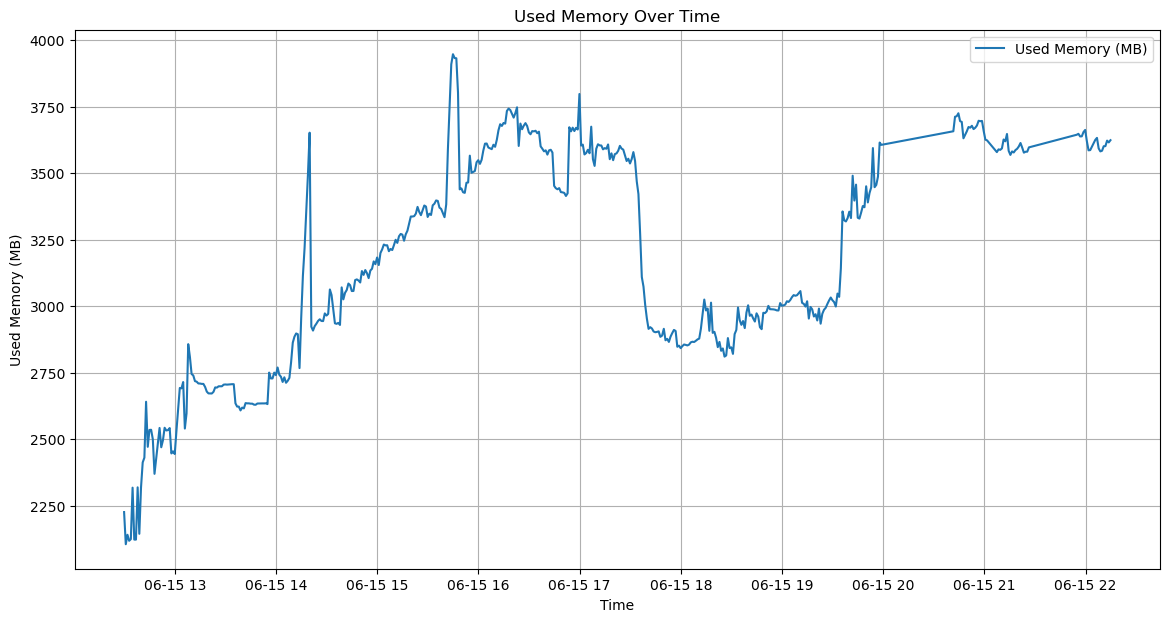

In [27]:
###Exploratory Data Analysis (EDA)
# Plotting time series data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['used_memory_mb'], label='Used Memory (MB)')
plt.title('Used Memory Over Time')
plt.xlabel('Time')
plt.ylabel('Used Memory (MB)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
pip install pandas numpy statsmodels


Note: you may need to restart the kernel to use updated packages.
